# California House Price Prediction

## Problem Statement
The goal of this project is to predict median house prices in California
using socioeconomic and geographic features with regression models.

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

 Load the dataset - California House Price Dataset

In [2]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="Price")

In [4]:
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
X.shape

(20640, 8)

Train–test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Baseline model

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))

Linear Regression R2: 0.5757877060324508
MAE: 0.5332001304956553
RMSE: 0.7455813830127764


Advanced model

In [9]:
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost R2:", r2_score(y_test, xgb_pred))
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

XGBoost R2: 0.8283822013335888
MAE: 0.31237069288459857
RMSE: 0.4742251619203734


## Evaluation Metrics
- R² Score: Measures how well the model explains variance
- MAE: Average absolute error
- RMSE: Penalizes larger errors

**Visualization**

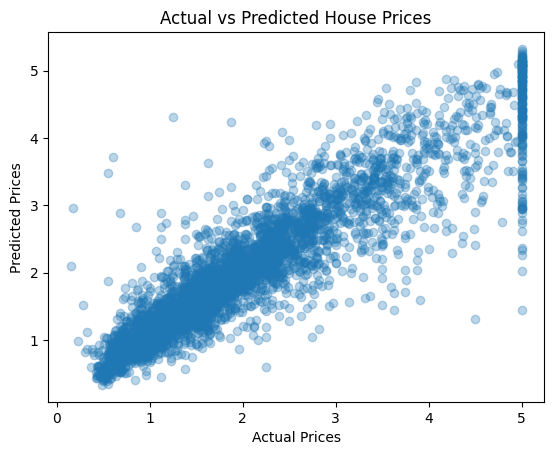

In [10]:
plt.figure()
plt.scatter(y_test, xgb_pred, alpha=0.3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


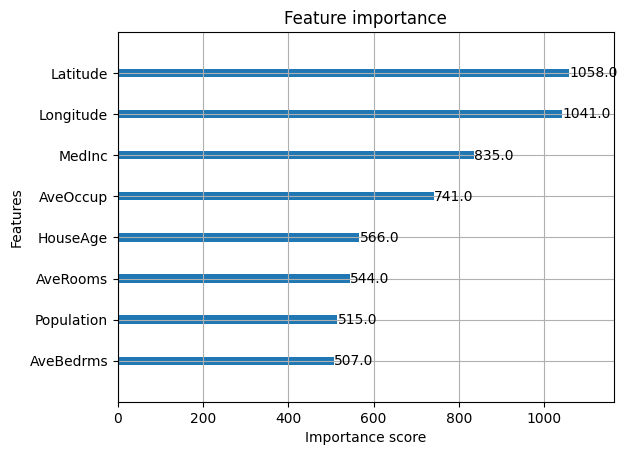

In [11]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show()

In [12]:
def predict_house_price(model, features):
    features = np.array(features).reshape(1, -1)
    price = model.predict(features)[0]
    return price * 100000

In [13]:
price = predict_house_price(
    xgb,
    [5.0, 25.0, 6.0, 1.0, 300.0, 3.0, 34.05, -118.25]
)

print("Predicted Price (USD):", price)

Predicted Price (USD): 252110.58


## Conclusion
- Linear Regression was used as a baseline model.
- XGBoost Regressor achieved better performance in terms of R² and RMSE.
- Tree-based models are more effective for capturing non-linear
  relationships in housing data.